# pandas 시작하기 - Getting Started with pandas

No handles with labels found to put in legend.


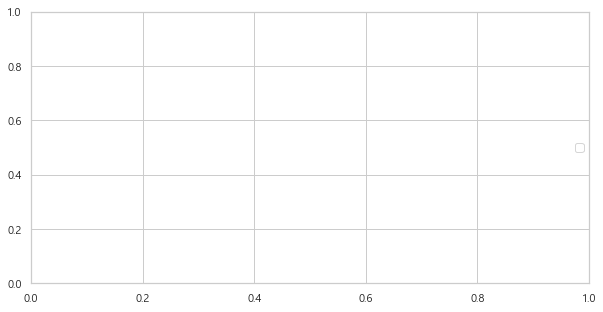

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt       # 그래프를 세부적으로 그리기 위한 옵션 설정
import matplotlib as mpl              # 한글폰트, 글씨체, 음수기호 등 전체적인 옵션 조정

import missingno as msno
%matplotlib inline      
# NoteBook 내에 그래프 그리기
# %matplotlib tk 는 별도의 창에 그래프를 그리고 직접 그래프의 속성을 변경할 수 있음
 
np.random.seed(12345)

mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
                                        # 윈도우 폰트 위치 - C:\Windows\Fonts
plt.figure(figsize=(10,5))              # 그래프 사이즈 설정
plt.rc('figure', figsize=(10, 6))
plt.legend(loc='right')                 # 범주의 위치 조정                                        

In [20]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## pandas 자료구조 소개 - Introduction to pandas Data Structure

### 시리즈 - Series

In [ ]:
# Series 생성
obj = pd.Series([4, 7, -5, 3], index=['a','b','c','d'])
obj

In [ ]:
# Series values 와 index 조회
obj.values, obj.index

In [ ]:
# Null 조회
obj.isnull(), obj.notnull()

In [ ]:
# Series의 name 과 index name 설정
obj.name = 'test name'
obj.index.name = 'ind'
obj

### 데이터프레임 - DataFrame

In [ ]:
# Dict를이용한 DataFrame 생성
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

In [ ]:
df.head(), df.tail()

In [ ]:
# Dict data를 이용하여 DataFrame을 만들고 컬럼의 순서를 재조정
pd.DataFrame(data, columns=['year', 'state', 'pop'])

In [ ]:
# Dict 및 List를 이용한 DataFrame 생성
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
df2

In [ ]:
# DataFrame의 column 삭제
# df.copy() 를 명확히 알고 사용하여야 한다
df2['eastern'] = df2.state == 'Ohio'
df2_1 = df2.copy()                   # copy() 사용 여부에 따라 결과값이 달라짐
del df2_1['eastern']
display('df2', 'df2_1')


In [ ]:
df2

In [ ]:
# Dict를 이용해 컬럼 및 인덱스를 포함하여 DataFrame 생성
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 = pd.DataFrame(pop)
df3

In [ ]:
# DataFrame의 index와 columns 조회
df2.index, df2.columns

In [ ]:
# DataFrame의 index 이름과 columns 이름 설정
df3.index.name = 'year'
df3.columns.name = 'state'
df3

In [ ]:
# DataFrame 행과 열 전환
display("df2", "df2.T")

In [ ]:
# DataFramd Data 조회 - 4가지 방법
df2['state'], df2.year, df2.loc['three'], df2.iloc[0]

### 인덱스 객체 - Index Object

In [ ]:
# Series index 처리
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index
index[1:]

In [ ]:
# pd.Index()를 이용한 인덱스 Object 생성
labels = pd.Index(np.arange(3))
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)
obj2.index is labels

In [ ]:
# index, columns 활용
print('Ohio' in df3.columns)
print(2003 in df3.index)
df3

In [ ]:
# index의 중복 허용
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

## 핵심 기능 - Essential Functionality

### 인덱스 재구성 - ReIndexing

In [ ]:
# Series ReIndexing - index 순서 재조정, 없는경우 NaN
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
# pd.reindex() - method='ffill'
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print(obj3)
obj3.reindex(range(6), method='ffill')

In [ ]:
# DataFrame reindex() - index 재조정
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
df2 = df.reindex(['a', 'b', 'c', 'd'])
display('df', 'df2')

In [ ]:
# DataFrame reindex() - columns 재조정
states = ['Texas', 'Utah', 'California']
df.reindex(columns=states)

### 행 또는 열 삭제하기 - Dropping Entries from an Axis

In [ ]:
# Series Data Drop
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj.drop(['e', 'd'])

In [ ]:
# DataFrame 행(row, index) 삭제
df = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

df1 = df.drop(['Colorado', 'Ohio'])
display('df', 'df1')

In [ ]:
# DataFrame 열(columns) 삭제
df1 = df.drop('two', axis=1)
display('df', 'df1')

In [ ]:
df1 = df.drop(['two', 'four'], axis='columns')
display('df', 'df1')

In [ ]:
# 원본 DataFrame 을 직접 변경 drop(, inplace=True)
df1 = df.copy()
df.drop('one', axis=1)
df1.drop('one', axis=1, inplace=True)
display('df', 'df1')

### 색인, 선택, 필터링 - Indexing, Selection, and Filtering

In [ ]:
# Series 조회
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj['b'])
print(obj[1])
print(obj[2:4])
print(obj[['b', 'a', 'd']])
print(obj[[1, 3]])
print(obj[obj < 2])

In [ ]:
# DataFrame 조회
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
print('~'*40)
print(data['two'])
print('~'*40)
print(data[['three', 'one']])
print('~'*40)
print(data[0:2])
print('~'*40)
print(data[data['three'] > 5])

#### loc 와 iloc 색인 - Selection with loc and iloc

In [ ]:
print(data)
print('~'*40)
print(data.loc['Colorado', ['two', 'three']])
print('~'*40)
print(data.iloc[2, [3, 0, 1]])
print('~'*40)
print(data.iloc[2])
print('~'*40)
print(data.iloc[[1, 2], [3, 0, 1]])


In [ ]:
print(data.loc[:'Utah', 'two'])
print('~'*40)
print(data.iloc[:, :3][data.three > 5])

### 정수 색인 - Integer Indexes

In [ ]:
# Label 과 Inter 가 동일한 경우 먼저 Label을 찾도록 설계되어 있음
ser = pd.Series(np.arange(3.))
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

print(ser[:1])
print('~'*40)
print(ser.loc[:1])   # Label Indexing
print('~'*40)
print(ser.iloc[:1])  # Inter Indexing

### 산술연산과 데이터 정렬 - Arithmetic and Data Alignment

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print('~'*40)
print(s2)
print('~'*40)
print(s1+s2)


In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df3 = df1 + df2
display('df1', 'df2', 'df3')

In [ ]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df3 = df1 - df2
display('df1','df2','df3')

####  fill_value를 이용한 산술 방법 - Arithmetic methods with fill values

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
display('df1','df2')

In [ ]:
df1 + df2

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
1/df1

In [ ]:
print(df1)
df1.rdiv(1)

In [ ]:
print(df1)
print('~'*40)
print(df1.sub(1))
print('~'*40)
print(df1.rsub(1))

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

#### DataFrame과 Series간 연산 - Operations between DataFrame and Series

In [ ]:
# Index가 동일한 경우 산술 연산
df = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = df.iloc[0]
df - series

In [ ]:
df

In [ ]:
series

In [ ]:
# Index가 다른 경우 산술 연산
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
df + series2

In [ ]:
series3 = df['d']
series3
df.sub(series3, axis='index')

In [ ]:
df

In [ ]:
series3

In [ ]:

df.sub(series3)

In [ ]:
# 무지 헤깔리는 axis
df.sub(series3, axis='index')

### 함수 적용과 매핑 - Function Application and Mapping

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

In [ ]:
# np.abs : 절대값
np.abs(df)

In [ ]:
f = lambda x: x.max() - x.min()
df.apply(f)

In [ ]:
df.apply(f, axis='columns')

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

df_1 = df.apply(f)
df_2 = df.apply(f, axis=1)
display('df','df_1','df_2')

In [ ]:
df

In [ ]:
# 요소별 함수의 적용
# applymap() - DataFrame 사용, map() - Series에서 사용
format = lambda x: '%.2f' % x
df_1 = df.applymap(format)
display('df','df_1')

In [ ]:
df['e'].map(format)

### 정렬과 순위 - Sorting and Ranking

In [ ]:
# sort_index() - index를 기준으로 sort
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

In [ ]:
df = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
df_1 = df.sort_index()
df_2 = df.sort_index(axis=1)
df_3 = df.sort_index(axis=1, ascending=False)
display('df','df_1','df_2','df_3')

In [ ]:
# Series - sort_values()
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

In [ ]:
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
df_1 = df.sort_values(by='b')
df_2 = df.sort_values(by=['a', 'b'])
display('df','df_1','df_2')



#### Ranking
**rank()** - ***특정변수를 기준으로 순위를 구함***

* 동점 처리 방법(tie-breaking methods)
1. 평균(method='average'), default
2. 최소값(method='min')
3. 최대값(method='max')
4. 첫번째값(method='first')
5. 조밀하게(method='dense')

In [ ]:
# rank() - 특정변수를 기준으로 순위를 구함
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

In [ ]:
obj.rank(method='min')

In [ ]:
# 높은 값일 수록 1순위 - rank()-ascending
obj.rank(ascending=False, method='min')

In [ ]:
df = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
df_1 = df.rank(method='first')
df_2 = df.rank(method='first', axis='columns')
display('df','df_1','df_2')

### 중복 레이블 색인 - Axis Indexes with Duplicate Labels

In [1]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
print(obj.index.is_unique)
print('~'*40)
print(obj['a'])
print('~'*40)
print(obj['c'])

False
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a    0
a    1
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4


In [2]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df.loc['b']

,0,1,2
b,-0.077441,-0.025440,0.161155
b,0.806652,0.654222,0.791707


## 기술 통계 계산과 요약 - Summarizing and Computing Descriptive Statistics

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
print(df)
print('~'*40)
print(df.sum())
print('~'*40)
print(df.sum(axis='columns'))
print('~'*40)

# 최대값을 가지는 index 출력
# Series는 index, DataFrame은 index, columns
print(df.idxmax())
print('~'*40)
print(df.cumsum())

### 상관관계와 공분산 - Correlation and Covariance

In [ ]:
price = pd.read_pickle('examples/yahoo_price.pkl')
volume = pd.read_pickle('examples/yahoo_volume.pkl')

In [ ]:
# 수익률 계산
# return(%) = (현재가격 - 어제가격)/어제가격 * 100
returns = price.pct_change()

In [ ]:
# pd.corr() - 데이터간 상관관계
# method = 'pearson'
#        = 'kendall'
#        = 'spearman'
returns['MSFT'].corr(returns['IBM'])

In [ ]:
returns['MSFT'].cov(returns['IBM'])

In [ ]:
import seaborn as sns 
returns.corr()

In [ ]:
# 공분산(Covariance)
# 2개의 확률변수의 상관정도를 나타내는 값
returns['MSFT'].cov(returns['IBM'])


In [ ]:
# 지정한 변수와 모든 변수간 상관계수
returns.corrwith(returns.IBM)

In [ ]:
returns.corrwith(volume)

In [ ]:
returns

In [ ]:
volume

### 유일값, 값 세기, 멤버십 - Unique Values, Value Counts, and Membership

In [5]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
print(obj.unique())
print('~'*40)
print(obj.value_counts())

['c' 'a' 'd' 'b']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a    3
c    3
b    2
d    1
dtype: int64


In [7]:
obj
mask = obj.isin(['b', 'c'])
print(mask)
print('~'*40)
print(obj[mask])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    c
5    b
6    b
7    c
8    c
dtype: object


In [8]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [13]:
# DataFrame 에서 value_counts()
# DataFrame의 여러 컬럼에 대해 히스토그램을 구함
df = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
df_1 = df.apply(pd.value_counts).fillna(0)
display('df','df_1')     

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4
,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0


# 데이터 로딩과 저장, 파일 형식 - Data Loading, Storage and File Formats

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 텍스트 파일에서 데이터 읽고 쓰기 - Reading and Writing Data in Text Format

In [10]:
# Read CSV file to Dataframe
df = pd.read_csv('examples/ex1.csv')
df_1 = pd.read_table('examples/ex1.csv', sep=',')
display('df','df_1')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
df_1 = pd.read_csv('examples/ex2.csv', header=None)
df_2 = pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd','message'])
display('df_1','df_2')

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
# 컬럼명을 지정하고 한개 컬럼을 index로 지정
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [15]:
# 2의 index 설정
df = pd.read_csv('examples/csv_mindex.csv',
                index_col=['key1', 'key2'])
df

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [20]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 '\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 '\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 '\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 '\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [21]:
# 확장자가 csv가 아닌 파일 즉, 데이터를 구분하는 구분자가 쉼표가 아니면 sep 인수를 써서 구분자를 지정
# 구분자의 길이가 정해지지 않은 공백인 경우 \s+ 정규식 문자열을 사용

pd.read_table('examples/ex3.txt', sep='\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [25]:
# 자료 파일중에 건너뛰어야 할 행이 있다면 skiprows 인수 사용
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [54]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [55]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [56]:
# NaN 값의 지정
# Pandas가 기본으로 인정하는 NaN : NaN, NULL, NA
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [57]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### 텍스트 파일 조금씩 일고 쓰기 - Reading Text in Pieces

In [58]:
# pandas options - 출력 max 갯수
pd.options.display.max_rows = 10

In [6]:
df = pd.read_csv('examples/ex6.csv')
df_1 = pd.read_csv('examples/ex6.csv', nrows=5) # Loading Data 갯수 제한
display('df',' df_1')

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [8]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

### 텍스트 형식으로 저장하기 - Writing Data to Text Format

In [9]:
data = pd.read_csv('examples/ex5.csv')
data.to_csv('examples/out.csv')

In [15]:
import sys
data.to_csv(sys.stdout, sep='|')
print('~'*40)
data.to_csv(sys.stdout, na_rep='NULL')
print('~'*40)
data.to_csv(sys.stdout, index=False, header=False, na_rep='NaN')
print('~'*40)
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])



|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
one,1,2,3.0,4,NaN
two,5,6,NaN,8,world
three,9,10,11.0,12,foo
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
a,b,c
1,2,3.0
5,6,
9,10,11.0


In [17]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('examples/tseries.csv')

### 구분자 형식 다루기 - Working with Delimited Formats

In [19]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [20]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

header, values = lines[0], lines[1:]

data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict


{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

### JSON 데이터 - JSON Data

In [25]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [28]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [35]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [36]:
siblings = pd.DataFrame(result['siblings'], columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [37]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [38]:
print(data.to_json())
print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML과 HTML: 웹 스크래핑 - XML and HTML: Web Scraping

In [39]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [42]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2001      4
2004      4
2003      3
2007      3
2000      2
Name: Closing Date, dtype: int64

In [ ]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

#### lxml을 이용한 XML 파싱 - 
Parsing XML with lxml.objectify

In [43]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [45]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [46]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,INDICATOR_NAME,DESCRIPTION,PERIOD_YEAR,PERIOD_MONTH,CATEGORY,FREQUENCY,INDICATOR_UNIT,YTD_TARGET,YTD_ACTUAL,MONTHLY_TARGET,MONTHLY_ACTUAL
0,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,1,Service Indicators,M,%,95.0,96.9,95.0,96.9
1,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,2,Service Indicators,M,%,95.0,96.0,95.0,95.0
2,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,3,Service Indicators,M,%,95.0,96.3,95.0,96.9
3,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,4,Service Indicators,M,%,95.0,96.8,95.0,98.3
4,Metro-North Railroad,On-Time Performance (West of Hudson),Percent of commuter trains that arrive at thei...,2008,5,Service Indicators,M,%,95.0,96.6,95.0,95.8


In [48]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [49]:
root
root.get('href')
root.text

'Google'

## 이진 데이터 형식 - Binary Data Formats

In [51]:
frame = pd.read_csv('examples/ex1.csv')
frame
frame.to_pickle('examples/frame_pickle')

pd.read_pickle('examples/frame_pickle')


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### HDF5 형식 사용하기 - Using HDF5 format

In [52]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [55]:
store['obj1']

,a
0,-0.204708
1,0.478943
2,-0.519439
3,-0.555730
4,1.965781
...,...
95,0.795253
96,0.118110
97,-0.748532
98,0.584970


In [56]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()

In [57]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,-0.204708
1,0.478943
2,-0.519439
3,-0.555730
4,1.965781


### 마이크로소프트 엑셀 읽어오기 - Reading Microsoft Excel Files

In [60]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [61]:
df = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
df

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [62]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [63]:
df.to_excel('examples/ex2.xlsx')


## 웹 API 사용하기 - Interacting with Web APIs

In [66]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [67]:
data = resp.json()
data[0]['title']

'ENH: Add support for more placeholders in `guess_datetime_format`'

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

## 데이터베이스와 함께 사용하기 - Interacting with Databases

In [69]:
import sqlite3
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [70]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [71]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [72]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [73]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [74]:
!rm mydata.sqlite

rm: cannot remove 'mydata.sqlite': Device or resource busy


# 데이터 정제와 준비 - Data Cleaning and Preparation

## 결측 데이터 처리하기 - Handling Missing Data

In [75]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [76]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

#### 결측 데이터 조회 - Filtering Out Missing Data

In [79]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [80]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [89]:
df = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.],[NA,NA,NA,NA]])
df_1 = df.dropna()
df_2 = df.dropna(axis=1)
df_3 = df.dropna(how='all')
df_4 = df.dropna(how='all', axis=1)
display('df','df_1', 'df_2', 'df_3', 'df_4')

df
     0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN
4  NaN  NaN  NaN NaN

df_1
Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []

df_2
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

df_3
     0    1    2   3
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

df_4
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
4  NaN  NaN  NaN

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [94]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df_1 = df.dropna()
df_2 = df.dropna(thresh=2)  # Null이 아닌 값이 thresh 이상인 것은 drop 하지 마세요
display('df','df_1','df_2')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660


### 결측치 채우기 - Filling Missing Data

In [96]:
df_1 = df.fillna(0)
display('df','df_1')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
0,-1.677790,0.000000,0.000000
1,-0.367488,0.000000,0.000000


In [97]:
df_1 = df.fillna({1:0.5, 2: 0})
display('df','df_1')

,0,1,2
0,-1.677790,NaN,NaN
1,-0.367488,NaN,NaN
2,-0.247699,NaN,-0.116747
3,-1.844788,NaN,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731
,0,1,2
0,-1.677790,0.500000,0.000000
1,-0.367488,0.500000,0.000000


In [98]:
_ = df.fillna(0, inplace=True)   # 원본 데이터를 직접 변경
df

,0,1,2
0,-1.677790,0.000000,0.000000
1,-0.367488,0.000000,0.000000
2,-0.247699,0.000000,-0.116747
3,-1.844788,0.000000,-0.776967
4,1.440167,-0.110557,1.227387
5,1.920784,0.746433,2.224660
6,-0.679400,0.727369,-0.868731


In [99]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df_1 = df.fillna(method='ffill')
df_2 = df.fillna(method='ffill', limit=2)
display('df','df_1','df_2')

,0,1,2
0,-1.213851,-0.470631,-0.919242
1,-0.838827,0.435155,-0.557805
2,-0.567455,NaN,-0.926557
3,1.755108,NaN,1.270025
4,-0.974378,NaN,NaN
5,-0.289436,NaN,NaN
,0,1,2
0,-1.213851,-0.470631,-0.919242
1,-0.838827,0.435155,-0.557805
2,-0.567455,0.435155,-0.926557


In [100]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

## 데이터 변형 - Data Transformation

### 중복 제거하기 - Removing Duplicates

In [110]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
df_1 = df.duplicated()        # 중복여부 Check
df_2 = df.drop_duplicates()   # 중복 데이터 Drop
df, df_1, df_2

(    k1  k2
 0  one   1
 1  two   1
 2  one   2
 3  two   3
 4  one   3
 5  two   4
 6  two   4,
 0    False
 1    False
 2    False
 3    False
 4    False
 5    False
 6     True
 dtype: bool,
     k1  k2
 0  one   1
 1  two   1
 2  one   2
 3  two   3
 4  one   3
 5  two   4)

In [114]:
df['v1'] = range(7)
df_1 = data.drop_duplicates(['k1'])
display('df', 'df_1')

df
    k1  k2  v1
0  one   1   0
1  two   1   1
2  one   2   2
3  two   3   3
4  one   3   4
5  two   4   5
6  two   4   6

df_1
    k1  k2
0  one   1
1  two   1

In [115]:
df_1 = df.drop_duplicates(['k1', 'k2'], keep='last')
display('df', 'df_1')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6
,k1,k2,v1
0,one,1,0
1,two,1,1


### 함수나 매핑을 이용한 데이터 변형 - Transforming Data Using a Function or Mapping

In [1]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [2]:
# 컬럼 데이터 소문자로 변경
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

# 데이터 변경
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [3]:
# 컬럼 데이터 변경
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 값 치환하기 - Replacing Values

In [18]:
# Series 값 변환
data = pd.Series([1., -999., 2., -999., -1000., 3.])
print(data.replace(-999, np.nan))
print('~'*40)
print(data.replace([-999, -1000], np.nan))
print('~'*40)
print(data.replace([-999, -1000], [np.nan,0]))
print('~'*40)
print(data.replace({-999: np.nan, -1000: 0}))


0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


### 축 인덱스 이름 변경 - Renaming Axis Indexes

In [46]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [47]:
# 인덱스의 이름의 일부로 변경
transform = lambda x: x[:4].upper()
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [49]:
# 인덱스명은 title로 컬럼명은 대문자로 변경
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [50]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### 불연속(이산)과 범주 만들기 - Discretization and Binning

In [64]:
ages = [20, 25, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [70]:
bins = [18, 25, 35, 60, 100]  # default : 왼쪽 미포함, 오른쪽 포함
cats = pd.cut(ages, bins)
print(cats)
print('~'*40)
print(cats.codes)     # cut을 통해 그룹핑의 ages의 값이 몇번째 그룹인지 출력
print('~'*40)
print(cats.categories)
print('~'*40)
print(pd.value_counts(cats))



[(18, 25], (18, 25], (18, 25], (18, 25], (25, 35], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 13
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0 0 0 0 1 0 0 2 1 3 2 2 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(18, 25]     6
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [71]:
# 왼쪽 포함 오른쪽 미포함
pd.cut(ages, [18, 26, 36, 61, 100], right=False)


[[18, 26), [18, 26), [18, 26), [18, 26), [26, 36), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 13
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [72]:
# 데이터 범주화시 범주명 지정
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'Youth', 'YoungAdult', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 13
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [107]:
# 범주의 갯수를 지정하여 범주화
data = np.random.rand(20)
temp = pd.cut(data, 4, precision=2)
# temp = pd.cut(data, 4, precision=2, labels=['first','second','third','fourth'])   # labels 적용
print(temp)
print('~'*40)
print(pd.value_counts(temp))
print('~'*40)
print(temp.value_counts())


[(0.24, 0.47], (0.47, 0.7], (0.0046, 0.24], (0.24, 0.47], (0.0046, 0.24], ..., (0.7, 0.94], (0.47, 0.7], (0.0046, 0.24], (0.24, 0.47], (0.24, 0.47]]
Length: 20
Categories (4, interval[float64]): [(0.0046, 0.24] < (0.24, 0.47] < (0.47, 0.7] < (0.7, 0.94]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(0.24, 0.47]      7
(0.0046, 0.24]    6
(0.47, 0.7]       4
(0.7, 0.94]       3
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(0.0046, 0.24]    6
(0.24, 0.47]      7
(0.47, 0.7]       4
(0.7, 0.94]       3
dtype: int64


In [108]:
# 4분위(사분위)로 데이터 범주화
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats
pd.value_counts(cats)

(-4.763, -0.655]    250
(-0.655, 0.05]      250
(0.05, 0.737]       250
(0.737, 3.178]      250
dtype: int64

In [111]:
# (0 ~ 10%], (10% ~ 50%], (50% ~ 90%], (90% ~ 100%] 의 도수 분포 
temp = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
pd.value_counts(temp)


(-1.228, -0.0322]    400
(-0.0322, 1.294]     400
(-3.02, -1.228]      100
(1.294, 3.239]       100
dtype: int64

### 특잇값 찾고 제외하기 - Detecting and Filtering Outliers

In [18]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [20]:
data.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [22]:
col = data[2]
col[np.abs(col) > 3]

5      3.248944
102    3.176873
324    3.260383
499   -3.056990
586   -3.184377
Name: 2, dtype: float64

In [30]:
# any() - 1개라도  Ture이면 True, any() - 모두가 True이면 Truee
data[np.abs(data) > 3].any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

<AxesSubplot:ylabel='Count'>

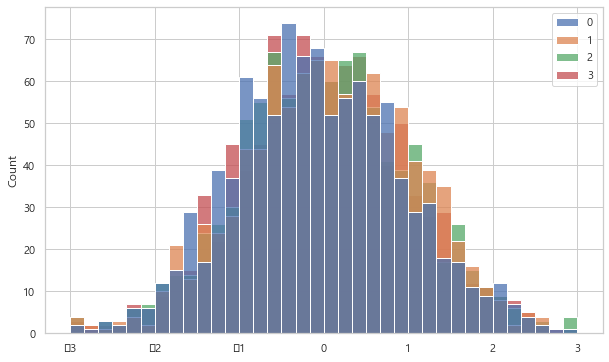

In [53]:
sns.histplot(data=data)

In [39]:
# Outliers 처리
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


<AxesSubplot:ylabel='Count'>

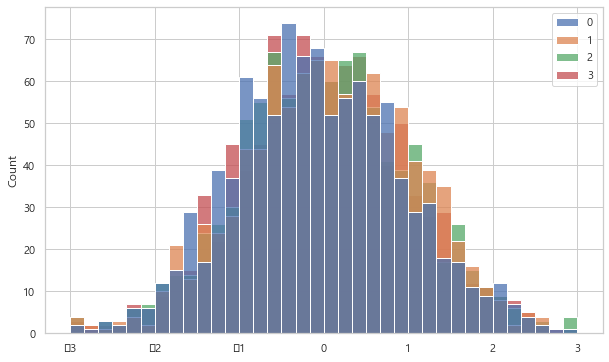

In [56]:
sns.histplot(data)

In [57]:
# np.sign() - 음수이면 -1.0, 양수이면 1.0, 0이면 0 반환
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0


### 치한과 샘플링 - Permutation and Random Sampling
* 무작위 행 sampling
  1. pandas.DataFrame.sample()
  2. numpy.random.permutation()
  3. sklearn.utils.shuffle()

In [60]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([1, 3, 0, 2, 4])

In [63]:
# take() - 입력된 축과 정수 인덱스에 해당하는 요소들을 반환
df.take(sampler)


,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19


In [64]:
df.sample(n=3)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
4,16,17,18,19


In [65]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

3    6
0    5
4    4
1    7
1    7
2   -1
3    6
0    5
1    7
2   -1
dtype: int64

### 표시자/더미 변수 계산하기 - Computing Indicator/Dummy Variables
* 데이터 분석시 범주데이터 문자를 관계성이 없는 숫자로 변경할 필요가 있음
  - 예시) 요일, 색깔 등
* pd.getdummies() - one-hot encoding 방식

In [71]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [77]:
# pd.get_dummies : 데이터를 one-hot encoding 으로 변환
# df['data1'] : Series 로 리턴
# df[['data1']] : DataFrame으로 리턴
# pd.join : 두개의 DataFrame을 합침
# df.join(df1, how='inner'|'outer', on='컬럼명' )
# df.join(df1) - df의 인덱스가 있는 것만 결과로 반환
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


#### 문자열 장르를 수치형 장르로 변경 

In [78]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [79]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [80]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [82]:
# 리스트 extend() - 리스트에 리스트를 추가하면 한개의 리스트로 반환
# 리스트 append() - 리스트에 리스트를 추가하면 리스트 자체가 추가된 리스트를 반환
# x.split('|') - split 된 요소를 리스트로 반환 
# pd.unique() - 유일값 반환
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [85]:
zero_matrix = np.zeros((len(movies), len(genres)))
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [87]:
gen = movies.genres[0]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [88]:
dummies.columns

Index(['Animation', 'Children's', 'Comedy', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi',
       'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [89]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [93]:
gen = movies.genres[1]
gen.split('|')
dummies.columns.get_indexer(gen.split('|'))

array([3, 1, 4], dtype=int64)

In [96]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [99]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

,movie_id,title,genres,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Adventure,Genre_Fantasy,Genre_Romance,Genre_Drama,...,Genre_Crime,Genre_Thriller,Genre_Horror,Genre_Sci-Fi,Genre_Documentary,Genre_War,Genre_Musical,Genre_Mystery,Genre_Film-Noir,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
values = np.random.rand(10)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,1,0,0,0,0


## 문자열 다루기 - String Manupulation

### 문자열 객체 메서드

In [118]:
# 문자열 분리
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [119]:
# 공백문자 제거
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [121]:
first, second, third = pieces
first + '::' + second + '::' + third  # 문자열 합치기

'a::b::guido'

In [122]:
'::'.join(pieces)  # 문자열 join()

'a::b::guido'

In [134]:
'guido' in val   # val에 'guido' 가 있는지
val.index(',')   # 첫번째 ','의 index 출력
val.index(':')   # 해당 문자가 없는 경우 ValueError 출력
val.find(':')    # 찾고자 하는 문자가 있으면 index, 없으면 -1 반환 

-1

In [138]:
val.count(',')  # 대상문자의 갯수
val.count(':')  # 대상문자가 없는 경우 0

0

In [141]:
val.replace(',','::')
val.replace(',','')
val.replace(':','::')  # 대상문자가 없는 경우 원래 문자 반환

'a,b,  guido'

### 정규 표현식 - Regular Expressions

In [142]:
# \s+ - \s(공백문자), +(\s가 한번 이상 반복)
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [143]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [144]:
regex.findall(text)

['    ', '\t ', '  \t']

In [166]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive - 대소문자 구분없이 매치 
regex = re.compile(pattern, flags=re.IGNORECASE)

In [167]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

#### re.search()
* 일치하는 첫번째 위치를 반환
* 문자열의 처음과 일치해야 하는 것은 아님
  * re.match()는 문자열의 처음부터 일치해야 함
* 시작 인덱스와 마지막 인덱스를 반환

In [168]:
m = regex.search(text)
text[m.start():m.end()]

'dave@google.com'

#### re.match()
* 문자열의 처음부터 시작하여 패턴이 일치되는 것을 확인
  * 매치 결과를 출력하지 않고 match Object 반환
  * 매치되는 것이 없을 때에는 None 반환


In [169]:
print(regex.match(text)) # 정규 표현 패턴이 문자열의 시작점에서부터 일치하는지 검사, 시작점이 아니므로 None 반환

None


#### re.sub() - 문자열 치환
* 패턴 일치된 문자열을 새로운 문자열로 대체하고, 대체된 원본 문서를 반환

In [170]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [177]:
# 이메일 주소를 3가지 컴포넌트로 나눠야 한다면 각 패턴을 괄호로 묶어줌
# 위의 e-mail 주소 패턴과 다른것은 괄호가 추가됨
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [178]:
# 처음부터 시작하는 문자열과 패턴이 일치하여 찾음
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [179]:
regex.findall(text) 

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [159]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



### 판다스에서 벡터화된 문자열 함수 - Vectorized String Functions in pandas

In [180]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [181]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [188]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [192]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [195]:
# Error ???    
matches.str.get(1)
# matches.str[0]

AttributeError: Can only use .str accessor with string values!

In [202]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

# 데이터 조인, 병합, 변형 - Data Wrangling: Join, Combine

## 계층적 인덱스 - hierarchical Indexing

In [214]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

a  1    0.758363
   2   -0.660524
   3    0.862580
b  1   -0.010032
   3    0.050009
c  1    0.670216
   2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [215]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [216]:
data['b']
data['b':'c']
data.loc[['b','d']]

b  1   -0.010032
   3    0.050009
d  2   -0.955869
   3   -0.023493
dtype: float64

In [220]:
data.loc[:,2]
data.loc[:,2:3]

a  2   -0.660524
   3    0.862580
b  3    0.050009
c  2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [223]:
data.unstack()
data.unstack().stack()

a  1    0.758363
   2   -0.660524
   3    0.862580
b  1   -0.010032
   3    0.050009
c  1    0.670216
   2    0.852965
d  2   -0.955869
   3   -0.023493
dtype: float64

In [1]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [3]:
frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [4]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

### 계층의 순서를 바꾸고 정렬하기 - Reordering and Sorting Levels

In [5]:
frame.swaplevel('key1','key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [6]:
frame.sort_index(level=1) # level은 왼쪽부터 0, 1, 2 ... 로 증가함

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [237]:
frame.swaplevel(0,1).sort_index(level=0)  # swaplevel() 수행후 sort_index() 수행

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### 계층별 요약 통계 - Summary Statistics by Levle

In [7]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [12]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [13]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Indexing with a DataFrame's columns

In [14]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [16]:
frame2 = frame.set_index((['c','d']))
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [17]:
# 컬럼을 인덱스로 만들면서 컬럼을 그대로 유지
frame.set_index(['c','d'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [18]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Combining and Merging Datasets

### Database-Style DataFrame Joins

In [21]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
display('df1', 'df2')

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
,key,data2
0,a,0
1,b,1


In [24]:
pd.merge(df1, df2) # on 옵션이 없으므로 key로 join
                   # default, how='inner'
                   # pd.merge(df1, df2, on='key'과 동일)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [25]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [26]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
display('df3','df4')

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6
,rkey,data2
0,a,0
1,b,1


In [27]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [29]:
print(display('df1','df2'))
pd.merge(df1, df2, how='outer')


df1
  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

df2
  key  data2
0   a      0
1   b      1
2   d      2


,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [30]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
display('df1','df2')

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5
,key,data2
0,a,0
1,b,1
2,a,2


In [31]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [32]:
pd.merge(df1, df2, how='inner')


,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [33]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
display('left','right')

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3
,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [34]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [35]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [36]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))


,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on Index

In [37]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
display('left1','right1')

left1
  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

right1
   group_val
a        3.5
b        7.0

In [38]:
# default, how='inner'
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [39]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [40]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
display('lefth','righth')

lefth
     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0

righth
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [44]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [45]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [47]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
display('left2','right2')

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0
,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [48]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [49]:
# index 로 Join 시 사용
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [50]:
# left1는 인덱스, right1은 커럼
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [52]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
display('left2','right2','another')

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0
,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0
,New York,Oregon
a,7.0,8.0


In [53]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [54]:
left2.join([right2, another], how='outer')


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along Axis

In [55]:
arr = np.arange(12).reshape((3, 4))
np.concatenate([arr, arr], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [56]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [57]:
pd.concat([s1, s2, s3])


a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [58]:
pd.concat([s1, s2, s3], axis=1)


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [59]:
s4 = pd.concat([s1, s3])
print(s4)
pd.concat([s1, s4], axis=1)

a    0
b    1
f    5
g    6
dtype: int64


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [60]:
s1, s4

(a    0
 b    1
 dtype: int64,
 a    0
 b    1
 f    5
 g    6
 dtype: int64)

In [61]:
pd.concat([s1, s4], axis=1, join='inner')


,0,1
a,0,0
b,1,1


In [65]:
# pandas 1.0 이상 버전에서 join_axes 삭제됨
# pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [66]:
s1, s3

(a    0
 b    1
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [69]:
# Multi index 생성
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [70]:
result.unstack()


,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


In [71]:
s1, s2, s3

(a    0
 b    1
 dtype: int64,
 c    2
 d    3
 e    4
 dtype: int64,
 f    5
 g    6
 dtype: int64)

In [73]:
# Series를 DataFrame 전환하면서 컬럼명 지정
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [74]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
display('df1','df2')

,one,two
a,0,1
b,2,3
c,4,5
,three,four
a,5,6
c,7,8


In [76]:
# DataFrame 의 멀티 컬럼 인덱스 생성
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [77]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [78]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [79]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
display('df1','df2')


df1
          a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221

df2
          b         d         a
0  0.274992  0.228913  1.352917
1  0.886429 -2.001637 -0.371843

In [80]:
# index 새로 생성
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


### Combining Data with Overlap

In [81]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a,b

(f    NaN
 e    2.5
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64,
 f    0.0
 e    1.0
 d    2.0
 c    3.0
 b    4.0
 a    NaN
 dtype: float64)

In [82]:
# np.where(조건, 참일때 값, 거짓일때 값)
# 조건문 처럼 사용 가능
# 단독사용 - np.where(a>1) : 만족하는 경우 index 반환
np.where(pd.isnull(a), b, a)


array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [84]:
b[:-2], a[2:]

(f    0.0
 e    1.0
 d    2.0
 c    3.0
 dtype: float64,
 d    NaN
 c    3.5
 b    4.5
 a    NaN
 dtype: float64)

In [83]:
# 값 대치하기
# b값 있으면 그대로 사용하고 b에 없는 값이 a에 있으면 추가
# b값에 Null 있으면 a값으로 대치
b[:-2].combine_first(a[2:])


a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [87]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
display('df1','df2')

df1
     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14

df2
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0

In [88]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [89]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [90]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [91]:
result.unstack()


number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [92]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [93]:
result.unstack('state')


state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [94]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [95]:
data2.unstack()


,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [98]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [99]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [100]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [101]:
df.unstack('state').stack('side')


state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "Long" to "Wide" Format

In [127]:
data = pd.read_csv('examples/macrodata.csv')

periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
data

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [128]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [121]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [129]:
pivoted = ldata.pivot('date','item','value')
pivoted

value                 
item                           infl    realgdp unemp
date                                                
1959-03-31 23:59:59.999999999  0.00   2710.349   5.8
1959-06-30 23:59:59.999999999  2.34   2778.801   5.1
1959-09-30 23:59:59.999999999  2.74   2775.488   5.3
1959-12-31 23:59:59.999999999  0.27   2785.204   5.6
1960-03-31 23:59:59.999999999  2.31   2847.699   5.2
...                             ...        ...   ...
2008-09-30 23:59:59.999999999 -3.16  13324.600   6.0
2008-12-31 23:59:59.999999999 -8.79  13141.920   6.9
2009-03-31 23:59:59.999999999  0.94  12925.410   8.1
2009-06-30 23:59:59.999999999  3.37  12901.504   9.2
2009-09-30 23:59:59.999999999  3.56  12990.341   9.6

[203 rows x 3 columns]

In [132]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.022074
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.369179
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.887204
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.014331
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.074155
5,1959-06-30 23:59:59.999999999,unemp,5.100,-0.048565
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,1.235021
7,1959-09-30 23:59:59.999999999,infl,2.740,-0.433295
8,1959-09-30 23:59:59.999999999,unemp,5.300,1.391035
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,0.820211


In [133]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.369179  0.022074   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.074155  0.014331   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.433295  1.235021   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.247423  0.820211   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.942369  0.543980   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.887204  
1959-06-30 23:59:59.999999999 -0.048565  
1959-09-30 23:59:59.999999999  1.391035  
1959-12-31 23:59:59.999999999  0.302271  
1960-03-31 23:59:59.999999999 -1.266383

In [134]:
pivoted['value'][:5]


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [135]:
ldata

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.022074
1,1959-03-31 23:59:59.999999999,infl,0.000,-1.369179
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.887204
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,0.014331
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.074155
...,...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370,1.213586
605,2009-06-30 23:59:59.999999999,unemp,9.200,-0.638036
606,2009-09-30 23:59:59.999999999,realgdp,12990.341,-0.373945
607,2009-09-30 23:59:59.999999999,infl,3.560,-0.053432


In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

In [140]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]


value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -1.369179  0.022074   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.074155  0.014331   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -0.433295  1.235021   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.247423  0.820211   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2 -0.942369  0.543980   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -0.720102  0.937250   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.958704 -0.375498   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.887204  
1959-06-30 23:59:59.999999999 -0.048565  
1959-09-30 23:59:59.999999999  1.391035  
1959-12-31 23:59:59.999999999  0.302271  
1960-03-31 23:59:59.999999999 -1.266383  
1960-06-30 23:59:59.999999999 -1.593952  
1960-09-30 23:59:59.999999999  0.794336

### Pivoting "Wide" to "Long" Format

In [141]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [143]:
melted = pd.melt(df,['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [144]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [145]:
reshaped.reset_index()


variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [146]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])


,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [147]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [148]:
pd.melt(df, value_vars=['key', 'A', 'B'])


,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# Plotting and Visualization

## A Brief matplotlib API Primer

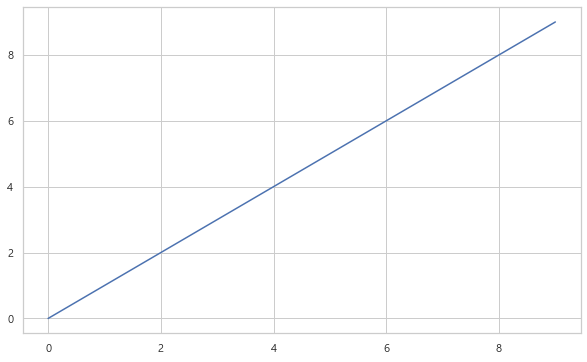

In [150]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots